# World Happiness report visualization

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. 

The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. 

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity 

## Import relevant libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [5]:
data = pd.read_csv("world-happiness-report-2021.csv")

In [6]:
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


# Explore the data

Before we move forward to any type of visualization first we need to explore the data.

In [7]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [8]:
data['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

In [9]:
data['Country name'].nunique()

149

In [10]:
data['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [11]:
def set_region_label(regional_indicator):
    if regional_indicator in ['Central and Eastern Europe', 'Western Europe']:
        return 'Europe'
    elif regional_indicator in ['East Asia', 'South Asia', 'Southeast Asia']:
        return 'Asia'
    elif regional_indicator in ['Middle East and North Africa', 'Sub-Saharan Africa']:
        return 'Africa'
    elif regional_indicator == 'Commonwealth of Independent States':
        return 'Commonwealth of Independent States'
    elif regional_indicator == 'Latin America and Caribbean':
        return 'Latin America and Caribbean'
    elif regional_indicator == 'North America and ANZ':
        return 'North America and ANZ'

In [12]:
data['region_label'] = data['Regional indicator'].apply(set_region_label)

In [13]:
data['region_label'].value_counts()

Africa                                53
Europe                                38
Asia                                  22
Latin America and Caribbean           20
Commonwealth of Independent States    12
North America and ANZ                  4
Name: region_label, dtype: int64

## A general look at the measure of happiness in 2021

In [14]:
summary_region = data[['Regional indicator','Ladder score','region_label']].groupby(['region_label','Regional indicator']).agg(['count','mean','max','min', 'median'])
summary_region.columns = ['{}_{}'.format(col[0], col[1]) for col in summary_region.columns]
summary_region.reset_index(inplace = True)
summary_region

,region_label,Regional indicator,Ladder score_count,Ladder score_mean,Ladder score_max,Ladder score_min,Ladder score_median
0,Africa,Middle East and North Africa,17,5.219765,7.157,3.658,4.8870
1,Africa,Sub-Saharan Africa,36,4.494472,6.049,3.145,4.6160
2,Asia,East Asia,6,5.810333,6.584,5.339,5.7610
3,Asia,South Asia,7,4.441857,5.269,2.523,4.9340
4,Asia,Southeast Asia,9,5.407556,6.377,4.426,5.3840
5,Commonwealth of Independent States,Commonwealth of Independent States,12,5.467000,6.179,4.875,5.4715
6,Europe,Central and Eastern Europe,17,5.984765,6.965,5.101,6.0780
7,Europe,Western Europe,21,6.914905,7.842,5.536,7.0850
8,Latin America and Caribbean,Latin America and Caribbean,20,5.908050,7.069,3.615,5.9920
9,North America and ANZ,North America and ANZ,4,7.128500,7.277,6.951,7.1430


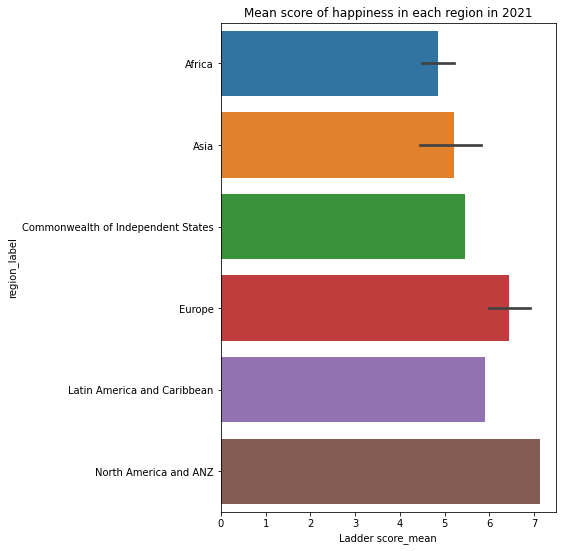

In [15]:
plt.figure(figsize=(6,9))
region_plot = sns.barplot(x=summary_region['Ladder score_mean'],y=summary_region['region_label'])
region_plot.set(title='Mean score of happiness in each region in 2021');

For more detailed analysis lets use regional indicator on y.

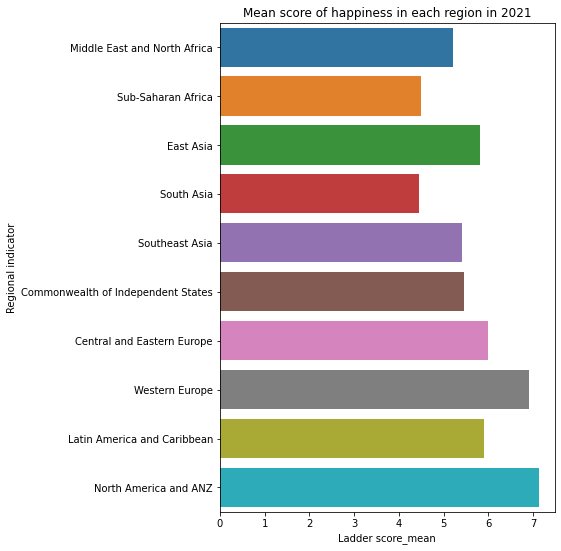

In [16]:
plt.figure(figsize=(6,9))
region_plot = sns.barplot(x=summary_region['Ladder score_mean'],y=summary_region['Regional indicator'])
region_plot.set(title='Mean score of happiness in each region in 2021');

In [17]:
describing_variables = list(data.columns[data.columns.str.startswith('Explained')])
describing_variables.append('region_label')

C:\Users\ruchi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


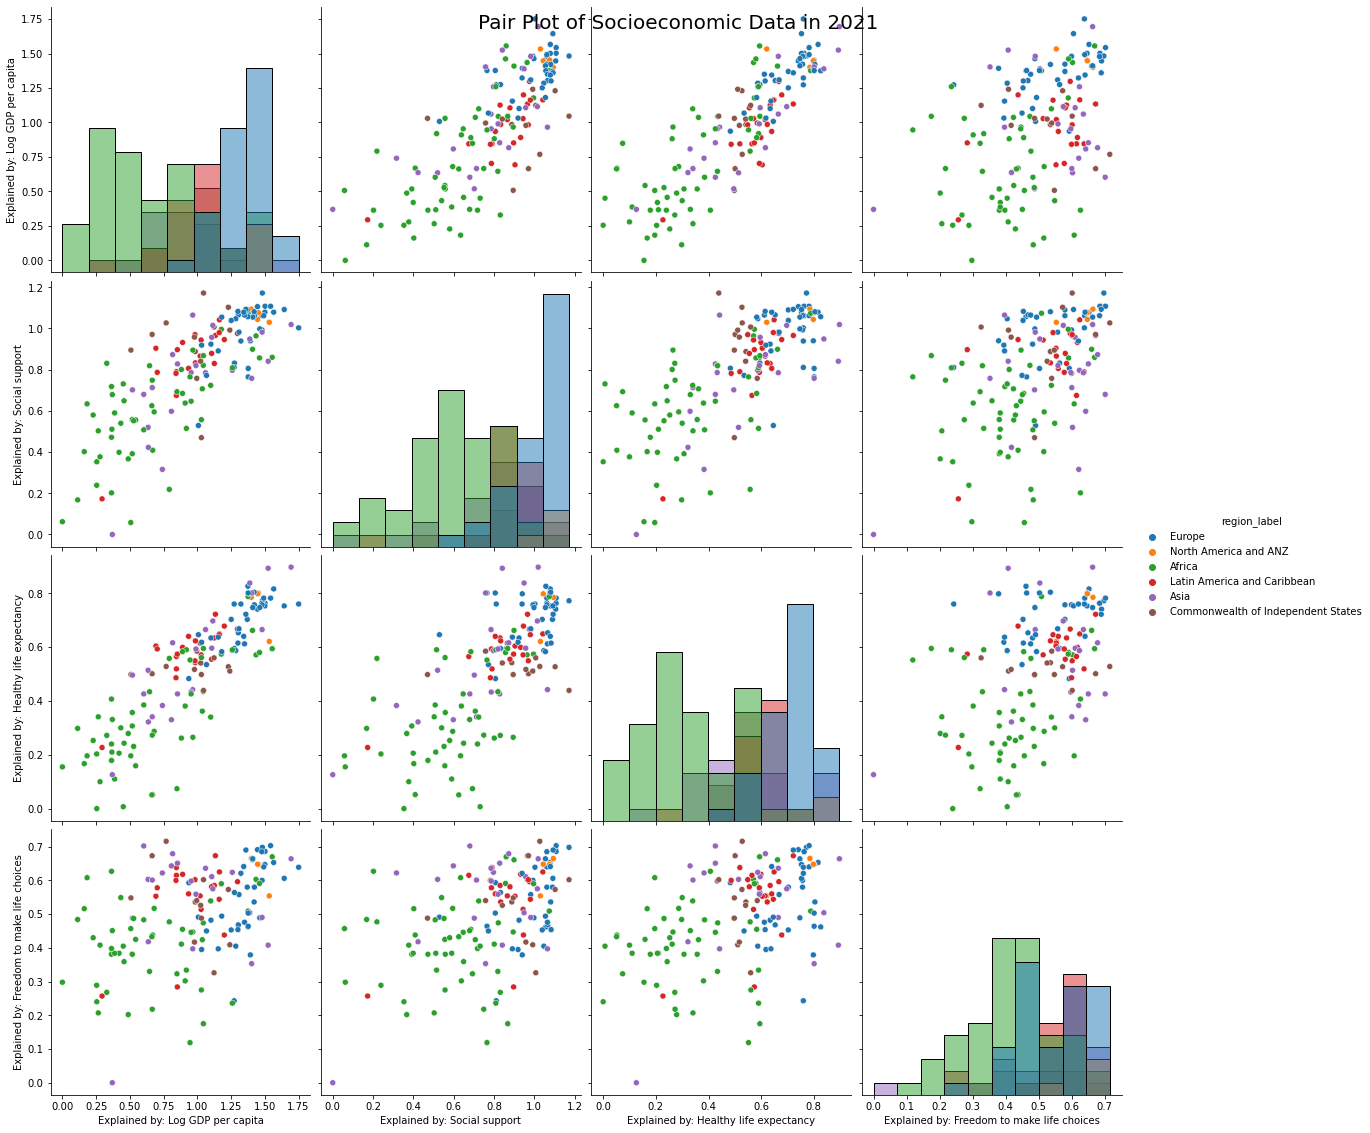

In [18]:
plot_describing_variables = sns.pairplot(data=data, vars = describing_variables[:4], hue="region_label", diag_kind="hist",height=10,size = 4)
plot_describing_variables.fig.suptitle('Pair Plot of Socioeconomic Data in 2021', size = 20);

## Where lived the least happy people in 2021 ?

In [19]:
'They are living in {}.'.format(data[data['Ladder score'] == min(data['Ladder score'])]['Country name'].to_string(index = False))

'They are living in  Afghanistan.'

## What differentiates the top 10 happiest countries out of the rest?

In [20]:
happiest_countries = data.sort_values('Ladder score', ascending = False).head(10)
happiest_countries['level'] = 'happiest'
unhappiest_countries= data.sort_values('Ladder score', ascending = True).head(10)
unhappiest_countries['level'] = 'unhappiest'

top_countries = pd.concat([happiest_countries, unhappiest_countries], ignore_index=True)

In [21]:
top_countries.groupby('region_label')['level'].value_counts().sort_values().unstack().fillna(0)

level,happiest,unhappiest
region_label,,
Africa,0.0,8.0
Asia,0.0,1.0
Europe,9.0,0.0
Latin America and Caribbean,0.0,1.0
North America and ANZ,1.0,0.0


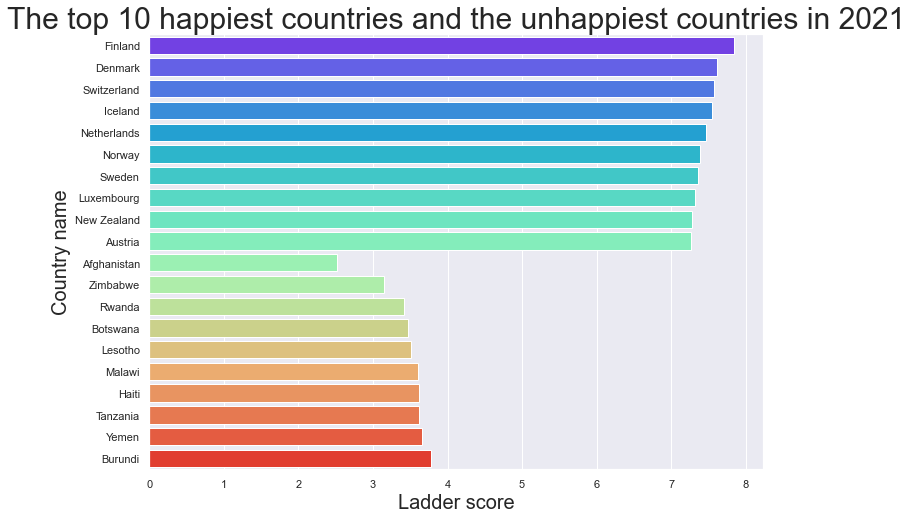

In [22]:
sns.set(rc={'figure.figsize':(11,8)})
pp = sns.barplot(x="Ladder score", y="Country name", data=top_countries, label="Ladder score", palette = 'rainbow');

pp.set_title('The top 10 happiest countries and the unhappiest countries in 2021',  size = 30);
pp.set_xlabel(pp.get_xlabel(), fontsize=20)
pp.set_ylabel(pp.get_ylabel(), fontsize=20);

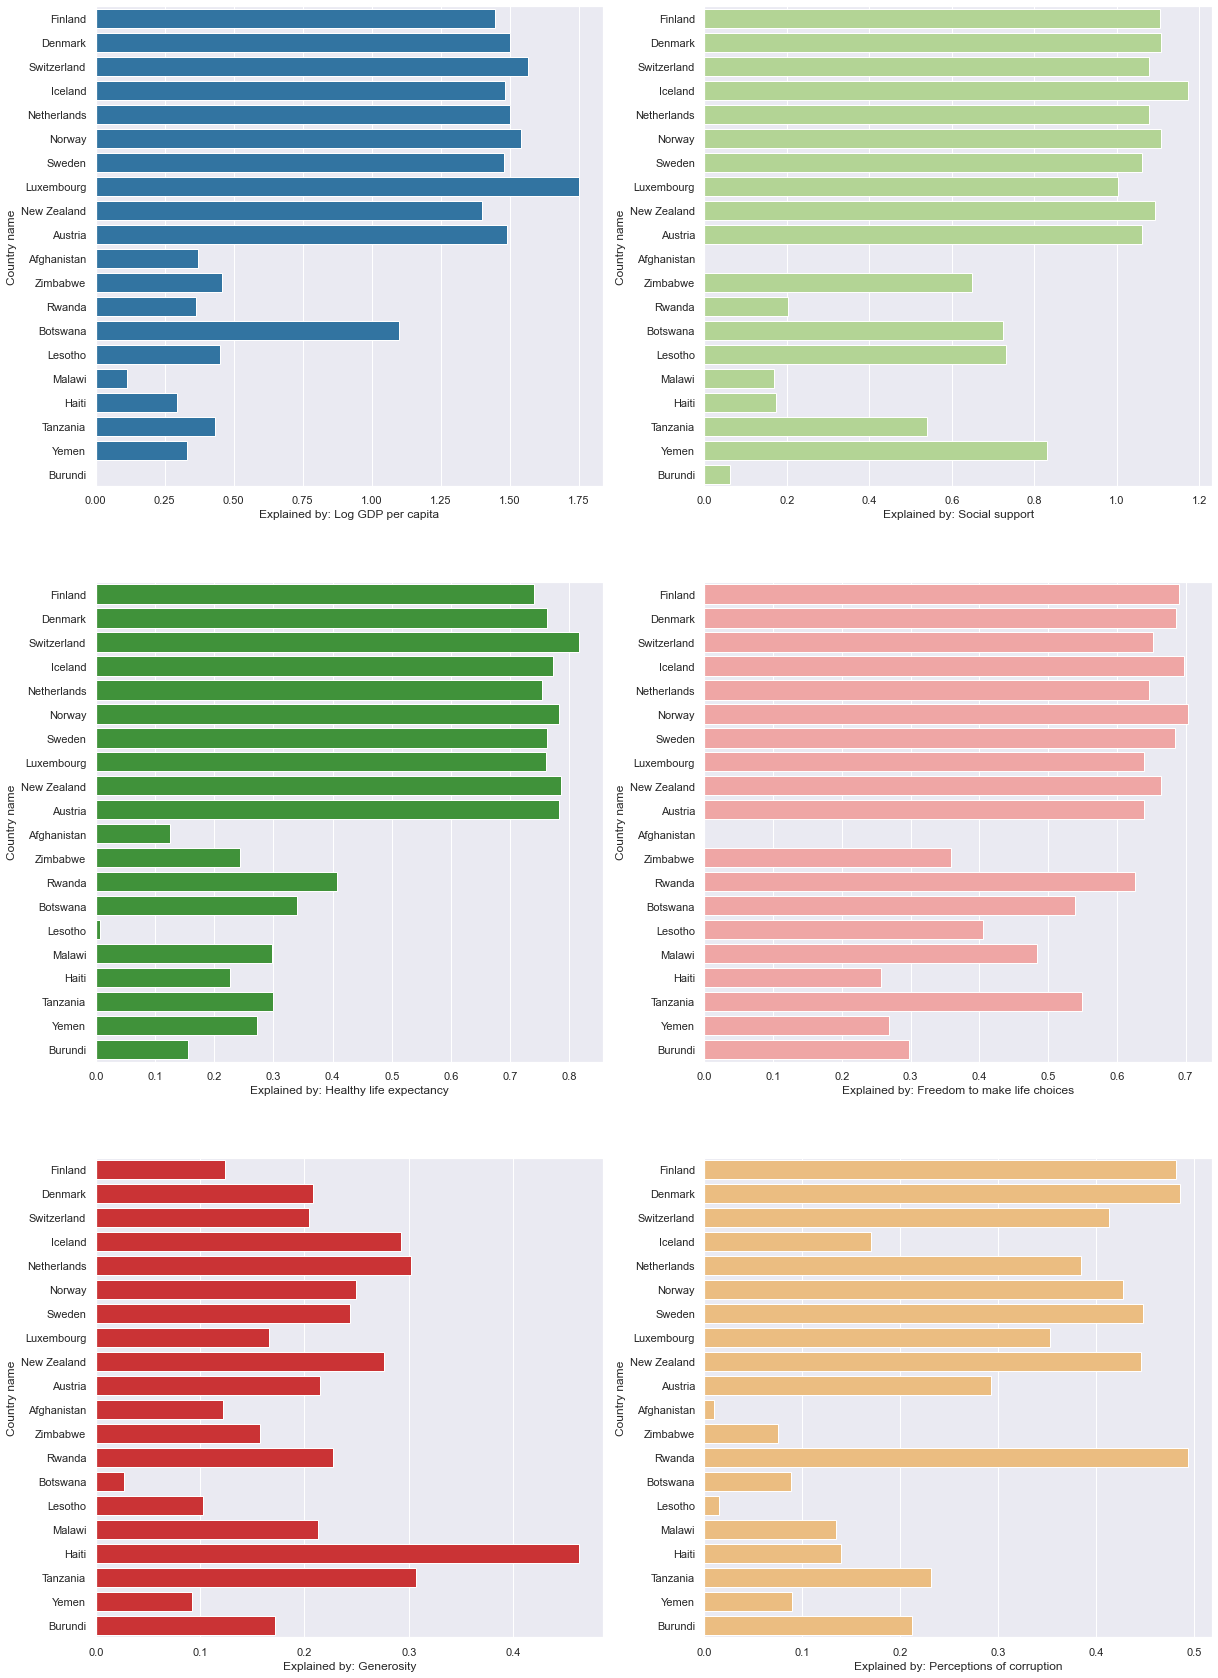

In [23]:
colors = sns.color_palette("Paired")
explainable_variables = describing_variables[:-1]

f, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(20, 30))
sns.barplot(x=explainable_variables[0] , y="Country name", data=top_countries, label=explainable_variables[0], color=colors[1], ax=ax[0][0])
sns.barplot(x=explainable_variables[1] , y="Country name", data=top_countries, label=explainable_variables[1], color=colors[2], ax=ax[0][1])
sns.barplot(x=explainable_variables[2] , y="Country name", data=top_countries, label=explainable_variables[2], color=colors[3], ax=ax[1][0])
sns.barplot(x=explainable_variables[3] , y="Country name", data=top_countries, label=explainable_variables[3], color=colors[4], ax=ax[1][1])
sns.barplot(x=explainable_variables[4] , y="Country name", data=top_countries, label=explainable_variables[4], color=colors[5], ax=ax[2][0])
sns.barplot(x=explainable_variables[5] , y="Country name", data=top_countries, label=explainable_variables[5], color=colors[6], ax=ax[2][1]);